In [1]:
##Pandas, Numpy, Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [2]:
data = pd.read_csv('data.csv')
data.shape

(756, 6)

In [3]:
data.head(5)

,Month,Week,Product,Qty,Promo type,Data Type
0,Aug-20,3/8/2020,AA,"1,911",NaN,History Data
1,Aug-20,3/8/2020,EO,"9,562",Promo Discount GT + Target Drive,History Data
2,Aug-20,3/8/2020,G5,976,NaN,History Data
3,Aug-20,3/8/2020,HM,467,Promo Discount GT,History Data
4,Aug-20,3/8/2020,MB,2,NaN,History Data


In [4]:
data.describe()

,Month,Week,Product,Qty,Promo type,Data Type
count,756,756,756,636,449,756
unique,29,126,6,491,4,2
top,Aug-20,3/8/2020,AA,1,Promo Discount GT,History Data
freq,30,6,126,37,270,636


In [5]:
# data = data.drop(columns=["Promo type"])

In [6]:
data.head()

,Month,Week,Product,Qty,Promo type,Data Type
0,Aug-20,3/8/2020,AA,"1,911",NaN,History Data
1,Aug-20,3/8/2020,EO,"9,562",Promo Discount GT + Target Drive,History Data
2,Aug-20,3/8/2020,G5,976,NaN,History Data
3,Aug-20,3/8/2020,HM,467,Promo Discount GT,History Data
4,Aug-20,3/8/2020,MB,2,NaN,History Data


In [7]:
X_data = data.drop(['Month'], axis=1)

# Y_data = data['Qty']

In [8]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Week        756 non-null    object
 1   Product     756 non-null    object
 2   Qty         636 non-null    object
 3   Promo type  449 non-null    object
 4   Data Type   756 non-null    object
dtypes: object(5)
memory usage: 29.7+ KB


In [9]:
X_data.head()

,Week,Product,Qty,Promo type,Data Type
0,3/8/2020,AA,"1,911",NaN,History Data
1,3/8/2020,EO,"9,562",Promo Discount GT + Target Drive,History Data
2,3/8/2020,G5,976,NaN,History Data
3,3/8/2020,HM,467,Promo Discount GT,History Data
4,3/8/2020,MB,2,NaN,History Data


In [10]:
X_data.shape

(756, 5)

In [11]:
X_data['Week'] = pd.to_datetime(X_data['Week'],dayfirst=True)


# X_data['day'] = X_data['Week'].dt.day
# X_data['month'] = X_data['Week'].dt.month
# X_data['year'] = X_data['Week'].dt.year

In [12]:
X_data.head(10)

,Week,Product,Qty,Promo type,Data Type
0,2020-08-03,AA,"1,911",NaN,History Data
1,2020-08-03,EO,"9,562",Promo Discount GT + Target Drive,History Data
2,2020-08-03,G5,976,NaN,History Data
3,2020-08-03,HM,467,Promo Discount GT,History Data
4,2020-08-03,MB,2,NaN,History Data
5,2020-08-03,RM,375,Promo Discount GT,History Data
6,2020-08-10,AA,"1,546",NaN,History Data
7,2020-08-10,EO,"9,636",Promo Discount GT + Target Drive,History Data
8,2020-08-10,G5,413,NaN,History Data
9,2020-08-10,HM,102,Promo Discount GT,History Data


In [13]:
# X_data = X_data.drop(columns=['Week'])
# X_data.head()

In [14]:
# X_data['Data Type'].value_counts()

In [15]:
X_data['Promo type'] = X_data['Promo type'].fillna("0")
X_data.head()

,Week,Product,Qty,Promo type,Data Type
0,2020-08-03,AA,"1,911",0,History Data
1,2020-08-03,EO,"9,562",Promo Discount GT + Target Drive,History Data
2,2020-08-03,G5,976,0,History Data
3,2020-08-03,HM,467,Promo Discount GT,History Data
4,2020-08-03,MB,2,0,History Data


In [16]:
X_data['Promo type'].value_counts()

0                                   307
Promo Discount GT                   270
Consumer Promo                      133
Promo Discount GT + Target Drive     26
Promo Kasir MT                       20
Name: Promo type, dtype: int64

In [17]:
type_to_numeric = {
    '0': 0,
    'Promo Discount GT': 1,
    'Consumer Promo': 2,
    'Promo Discount GT + Target Drive': 3,
    'Promo Kasir MT': 4,
}

X_data['Promo type'] = X_data['Promo type'].map(type_to_numeric).astype(int)
# X_data = X_data.drop(columns=['Promo type'])
X_data.head()

,Week,Product,Qty,Promo type,Data Type
0,2020-08-03,AA,"1,911",0,History Data
1,2020-08-03,EO,"9,562",3,History Data
2,2020-08-03,G5,976,0,History Data
3,2020-08-03,HM,467,1,History Data
4,2020-08-03,MB,2,0,History Data


In [18]:
X_train = X_data.loc[X_data['Data Type']=='History Data']
X_pred = X_data.loc[X_data['Data Type']=='Forecast']

In [19]:
X_train = X_train.drop(columns=['Data Type'])
X_train.head()

,Week,Product,Qty,Promo type
0,2020-08-03,AA,"1,911",0
1,2020-08-03,EO,"9,562",3
2,2020-08-03,G5,976,0
3,2020-08-03,HM,467,1
4,2020-08-03,MB,2,0


In [20]:
# Replace commas from the 'Qty' column
X_train['Qty'] = X_train['Qty'].str.replace(',', '')

# Convert 'Qty' column to numeric, replacing non-numeric values with NaN
X_train['Qty'] = pd.to_numeric(X_train['Qty'], errors='coerce')

# Drop rows with NaN values in the 'Qty' column
X_train.dropna(subset=['Qty'], inplace=True)

# Convert the 'Qty' column to integers
X_train['Qty'] = X_train['Qty'].astype(int)

In [21]:
X_pred = X_pred.drop(columns=['Data Type'])
X_pred.head()

,Week,Product,Qty,Promo type
636,2022-08-15,AA,NaN,0
637,2022-08-15,EO,NaN,0
638,2022-08-15,G5,NaN,0
639,2022-08-15,HM,NaN,0
640,2022-08-15,MB,NaN,0


In [22]:
X_train['Product'].value_counts()

AA    106
EO    106
G5    106
HM    106
RM    106
MB     74
Name: Product, dtype: int64

In [23]:
product_dfs = {product: group for product, group in X_train.groupby('Product')}
AA_data = product_dfs['AA']
EO_data = product_dfs['EO']
G5_data = product_dfs['G5']
HM_data = product_dfs['HM']
MB_data = product_dfs['MB']
RM_data = product_dfs['RM']

AA_data.head()


,Week,Product,Qty,Promo type
0,2020-08-03,AA,1911,0
6,2020-08-10,AA,1546,0
12,2020-08-17,AA,1072,0
18,2020-08-24,AA,1590,0
24,2020-08-31,AA,1760,0


In [24]:
product_dfs = {product: group for product, group in X_pred.groupby('Product')}
AA_pred = product_dfs['AA']
EO_pred = product_dfs['EO']
G5_pred = product_dfs['G5']
HM_pred = product_dfs['HM']
MB_pred = product_dfs['MB']
RM_pred = product_dfs['RM']

AA_pred.head()

,Week,Product,Qty,Promo type
636,2022-08-15,AA,NaN,0
642,2022-08-22,AA,NaN,0
648,2022-08-29,AA,NaN,0
654,2022-09-05,AA,NaN,0
660,2022-09-12,AA,NaN,0


In [25]:
AA_data = AA_data.drop(columns=['Product'])
EO_data = EO_data.drop(columns=['Product'])
G5_data = G5_data.drop(columns=['Product'])
HM_data = HM_data.drop(columns=['Product'])
MB_data = MB_data.drop(columns=['Product'])
RM_data = RM_data.drop(columns=['Product'])

AA_data.head()

,Week,Qty,Promo type
0,2020-08-03,1911,0
6,2020-08-10,1546,0
12,2020-08-17,1072,0
18,2020-08-24,1590,0
24,2020-08-31,1760,0


In [26]:
AA_pred = AA_pred.drop(columns=['Product'])
EO_pred = EO_pred.drop(columns=['Product'])
G5_pred = G5_pred.drop(columns=['Product'])
HM_pred = HM_pred.drop(columns=['Product'])
MB_pred = MB_pred.drop(columns=['Product'])
RM_pred = RM_pred.drop(columns=['Product'])

AA_pred.head()

,Week,Qty,Promo type
636,2022-08-15,NaN,0
642,2022-08-22,NaN,0
648,2022-08-29,NaN,0
654,2022-09-05,NaN,0
660,2022-09-12,NaN,0


In [27]:
AA_data = AA_data.set_index('Week')
EO_data = EO_data.set_index('Week')
G5_data = G5_data.set_index('Week')
HM_data = HM_data.set_index('Week')
MB_data = MB_data.set_index('Week')
RM_data = RM_data.set_index('Week')

In [28]:
AA_pred = AA_pred.set_index('Week')
EO_pred = EO_pred.set_index('Week')
G5_pred = G5_pred.set_index('Week')
HM_pred = HM_pred.set_index('Week')
MB_pred = MB_pred.set_index('Week')
RM_pred = RM_pred.set_index('Week')

In [29]:
AA_data.head

<bound method NDFrame.head of              Qty  Promo type
Week                        
2020-08-03  1911           0
2020-08-10  1546           0
2020-08-17  1072           0
2020-08-24  1590           0
2020-08-31  1760           0
...          ...         ...
2022-07-11   530           0
2022-07-18   541           0
2022-07-25   385           0
2022-08-01   758           0
2022-08-08   385           0

[106 rows x 2 columns]>

In [30]:
AA_pred.head()

,Qty,Promo type
Week,,
2022-08-15,NaN,0
2022-08-22,NaN,0
2022-08-29,NaN,0
2022-09-05,NaN,0
2022-09-12,NaN,0


In [31]:
# AA_train.index = pd.to_datetime(AA_train.index)
# AA_train.head()

<Axes: title={'center': 'AA'}, xlabel='Week'>

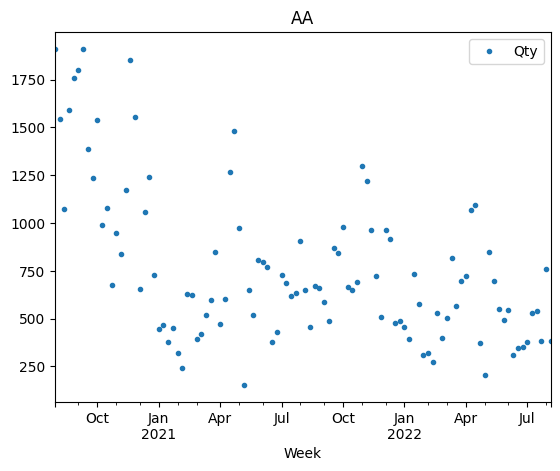

In [32]:
AA_data.iloc[:,:1].plot(style='.',title='AA')

<Axes: title={'center': 'EO'}, xlabel='Week'>

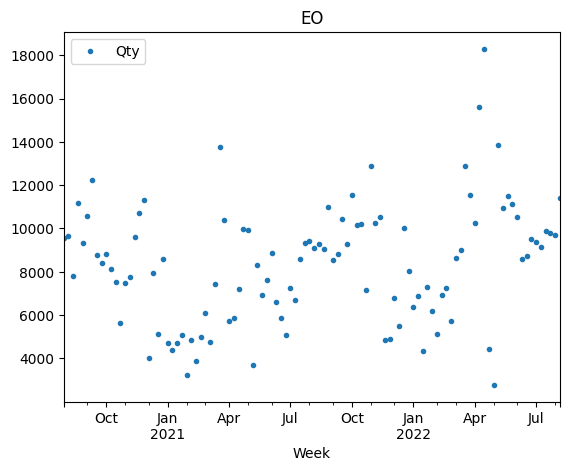

In [33]:
EO_data.iloc[:,:1].plot(style='.',title='EO')

<Axes: title={'center': 'G5'}, xlabel='Week'>

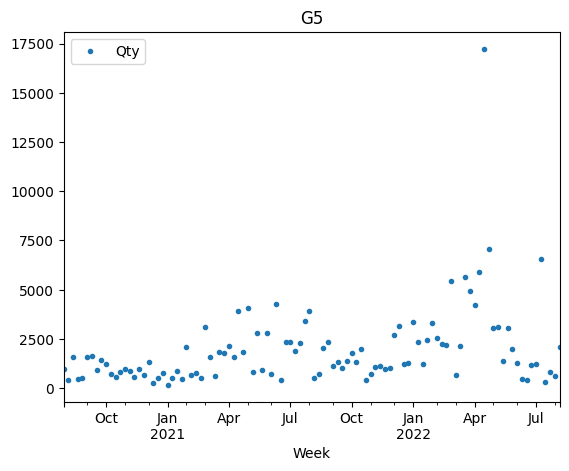

In [34]:
G5_data.iloc[:,:1].plot(style='.',title='G5')

<Axes: title={'center': 'HM'}, xlabel='Week'>

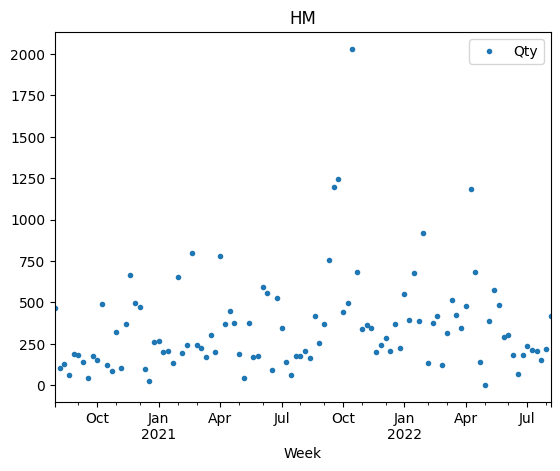

In [35]:
HM_data.iloc[:,:1].plot(style='.',title='HM')

<Axes: title={'center': 'MB'}, xlabel='Week'>

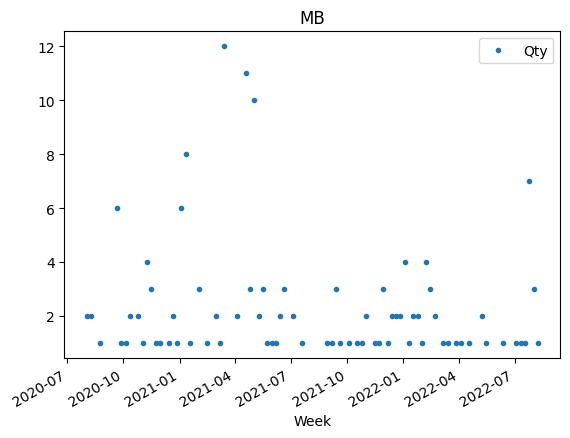

In [36]:
MB_data.iloc[:,:1].plot(style='.',title='MB')

<Axes: title={'center': 'RM'}, xlabel='Week'>

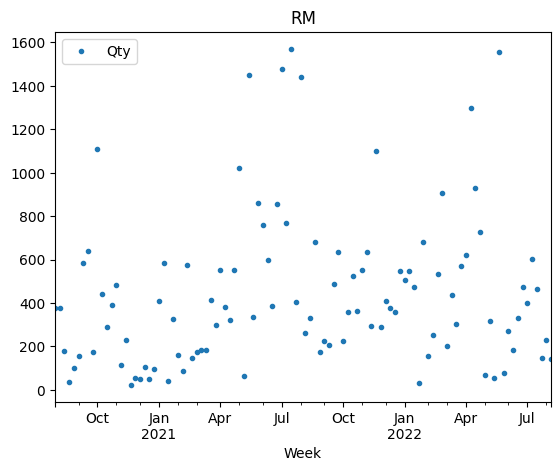

In [37]:
RM_data.iloc[:,:1].plot(style='.',title='RM')

In [38]:
from sklearn.model_selection import train_test_split
AA_test = AA_data[AA_data.index>='2022-02-01']
AA_train= AA_data[AA_data.index<'2022-02-01']

In [39]:
AA_test.head

<bound method NDFrame.head of              Qty  Promo type
Week                        
2022-02-07   320           1
2022-02-14   273           1
2022-02-21   528           1
2022-02-28   400           1
2022-03-07   505           1
2022-03-14   816           1
2022-03-21   565           1
2022-03-28   697           1
2022-04-04   722           1
2022-04-11  1068           1
2022-04-18  1092           1
2022-04-25   373           1
2022-05-02   203           1
2022-05-09   850           1
2022-05-16   698           1
2022-05-23   550           1
2022-05-30   491           1
2022-06-06   543           1
2022-06-13   311           1
2022-06-20   346           1
2022-06-27   349           1
2022-07-04   379           0
2022-07-11   530           0
2022-07-18   541           0
2022-07-25   385           0
2022-08-01   758           0
2022-08-08   385           0>

<Axes: xlabel='Week'>

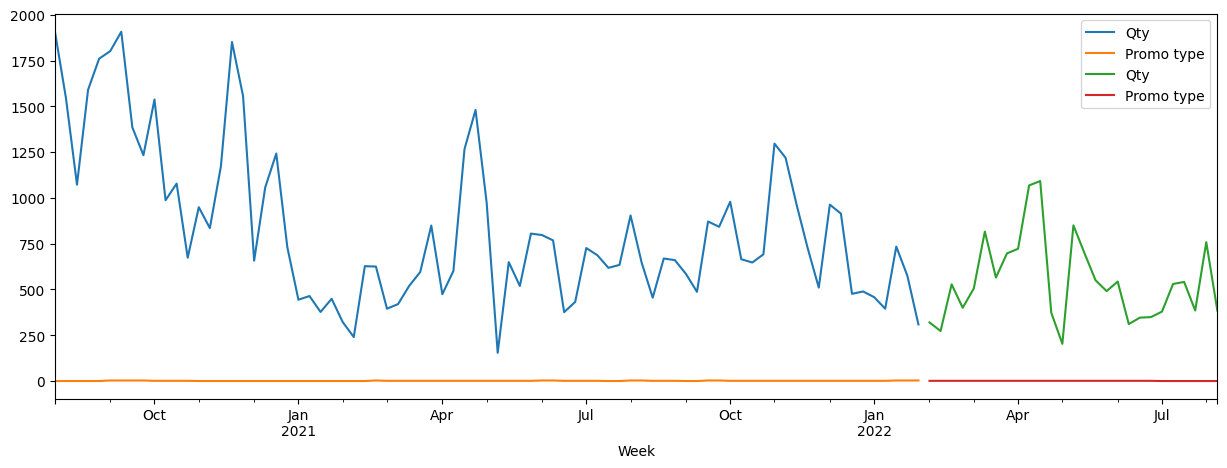

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
AA_train.plot(ax=ax, label="Train")
AA_test.plot(ax=ax, label="Test")

In [41]:
def create_features(df):
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

In [42]:
AA_train = create_features(AA_train)
AA_test = create_features(AA_test)
FEATURES = ['day','month','year','Promo type']
# FEATURES = ['day','month','year']
TARGET = 'Qty'

In [43]:
X_train = AA_train[FEATURES]
y_train = AA_train[TARGET]

X_test = AA_test[FEATURES]
y_test = AA_test[TARGET]

In [44]:
reg = xgb.XGBRegressor(n_estimators=20000,early_stopping_rounds=50,
                      learning_rate=0.0001)
reg.fit(X_train,y_train,
       eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=100)

[0]	validation_0-rmse:934.34827	validation_1-rmse:587.97786
[100]	validation_0-rmse:926.28065	validation_1-rmse:582.06114
[200]	validation_0-rmse:918.29795	validation_1-rmse:576.21330
[300]	validation_0-rmse:910.39942	validation_1-rmse:570.43377
[400]	validation_0-rmse:902.58429	validation_1-rmse:564.72205
[500]	validation_0-rmse:894.85177	validation_1-rmse:559.07760
[600]	validation_0-rmse:887.20119	validation_1-rmse:553.49991
[700]	validation_0-rmse:879.63180	validation_1-rmse:547.98843
[800]	validation_0-rmse:872.14285	validation_1-rmse:542.54270
[900]	validation_0-rmse:864.73362	validation_1-rmse:537.16218
[1000]	validation_0-rmse:857.40341	validation_1-rmse:531.84640
[1100]	validation_0-rmse:850.15122	validation_1-rmse:526.59482
[1200]	validation_0-rmse:842.97503	validation_1-rmse:521.40702
[1300]	validation_0-rmse:835.87392	validation_1-rmse:516.28246
[1400]	validation_0-rmse:828.84730	validation_1-rmse:511.22069
[1500]	validation_0-rmse:821.89451	validation_1-rmse:506.22121
[160

[12900]	validation_0-rmse:352.00679	validation_1-rmse:253.33607
[13000]	validation_0-rmse:349.70852	validation_1-rmse:252.80604
[13100]	validation_0-rmse:347.42813	validation_1-rmse:252.29236
[13200]	validation_0-rmse:345.16055	validation_1-rmse:251.79286
[13300]	validation_0-rmse:342.91329	validation_1-rmse:251.30880
[13400]	validation_0-rmse:340.68501	validation_1-rmse:250.84131
[13500]	validation_0-rmse:338.47435	validation_1-rmse:250.38446
[13600]	validation_0-rmse:336.27422	validation_1-rmse:249.92676
[13700]	validation_0-rmse:334.08440	validation_1-rmse:249.48210
[13800]	validation_0-rmse:331.90271	validation_1-rmse:249.05372
[13900]	validation_0-rmse:329.73081	validation_1-rmse:248.63821
[14000]	validation_0-rmse:327.57626	validation_1-rmse:248.23690
[14100]	validation_0-rmse:325.43773	validation_1-rmse:247.84955
[14200]	validation_0-rmse:323.31717	validation_1-rmse:247.47569
[14300]	validation_0-rmse:321.21268	validation_1-rmse:247.11492
[14400]	validation_0-rmse:319.12579	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
reg.feature_importances_
pd.DataFrame(data= reg.feature_importances_,
            index = reg.feature_names_in_,
            columns=['importance'])

,importance
day,0.016869
month,0.033513
year,0.909640
Promo type,0.039978


In [46]:
AA_test['prediction']=reg.predict(X_test)
AA_test.head(20)

,Qty,Promo type,day,month,year,prediction
Week,,,,,,
2022-02-07,320,1,7,2,2022,319.211487
2022-02-14,273,1,14,2,2022,435.134430
2022-02-21,528,1,21,2,2022,479.930786
2022-02-28,400,1,28,2,2022,475.452454
2022-03-07,505,1,7,3,2022,355.759247
2022-03-14,816,1,14,3,2022,448.056305
2022-03-21,565,1,21,3,2022,521.591003
2022-03-28,697,1,28,3,2022,524.234375
2022-04-04,722,1,4,4,2022,457.118835


<Axes: xlabel='Week'>

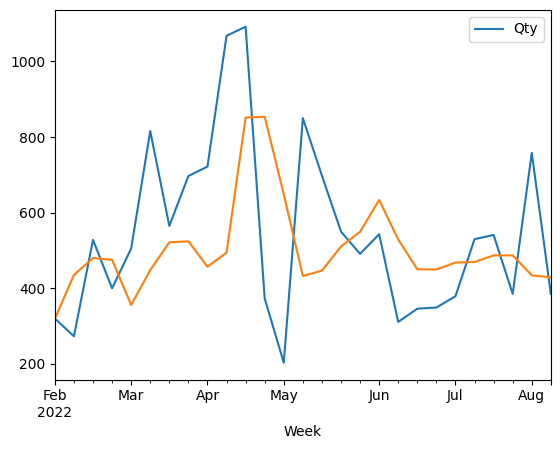

In [47]:
ax = AA_test[['Qty']].plot()
AA_test['prediction'].plot(ax=ax)

In [48]:
AA_pred = create_features(AA_pred)
X_pred = AA_pred[FEATURES]
AA_pred['Qty']=reg.predict(X_pred)
AA_pred.head(20)

,Qty,Promo type,day,month,year
Week,,,,,
2022-08-15,486.932861,0,15,8,2022
2022-08-22,486.932861,0,22,8,2022
2022-08-29,485.592804,0,29,8,2022
2022-09-05,446.161255,0,5,9,2022
2022-09-12,467.064789,0,12,9,2022
2022-09-19,486.932861,0,19,9,2022
2022-09-26,486.932861,0,26,9,2022
2022-10-03,467.968719,0,3,10,2022
2022-10-10,409.773834,0,10,10,2022


<Axes: xlabel='Week'>

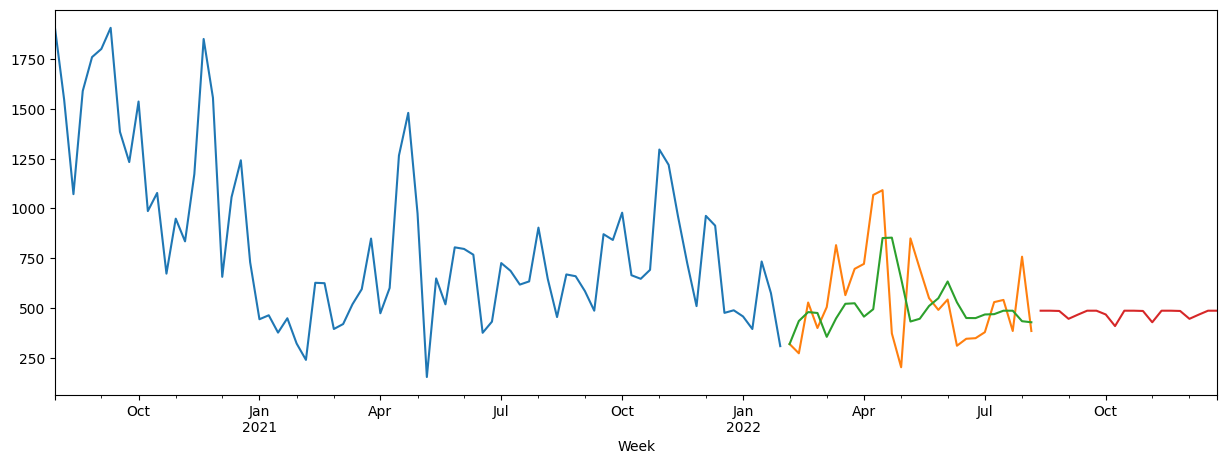

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
AA_train['Qty'].plot(ax=ax, label="Train")
AA_test['Qty'].plot(ax=ax, label="Test")
AA_test['prediction'].plot(ax=ax)
AA_pred['Qty'].plot(ax=ax, label="Forecast")

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
score = np.sqrt(mean_squared_error(AA_test['Qty'],AA_test['prediction']))
print(score)

240.42893551869855


In [52]:
np.abs(AA_test['Qty']-AA_test['prediction'])

Week
2022-02-07      0.788513
2022-02-14    162.134430
2022-02-21     48.069214
2022-02-28     75.452454
2022-03-07    149.240753
2022-03-14    367.943695
2022-03-21     43.408997
2022-03-28    172.765625
2022-04-04    264.881165
2022-04-11    573.502991
2022-04-18    240.352600
2022-04-25    480.674377
2022-05-02    445.331970
2022-05-09    417.371338
2022-05-16    251.527313
2022-05-23     39.461273
2022-05-30     58.515381
2022-06-06     90.676819
2022-06-13    217.997620
2022-06-20    104.215302
2022-06-27    100.762756
2022-07-04     88.968719
2022-07-11     60.431152
2022-07-18     54.067139
2022-07-25    101.932861
2022-08-01    323.832977
2022-08-08     43.873566
dtype: float64